In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import copy

In [2]:
folder   = "Model_Data/"
scen_list = ['Mixed', 'Fixed_PVs', 'Fixed_EVs']
algo_list= ['AHE', 'Diag', 'FP', 'SFP']
DAs_Names = ['Model_Data_DA_1_', 'Model_Data_DA_2_', 'Model_Data_DA_3_']

df_all =[]

time = [16+x for x in range(24)]

for sen in scen_list:
    for algo in algo_list: 
        for da in DAs_Names:
            df = pd.read_csv(folder+sen+"/"+da+algo+"_"+sen+".csv")
            time_list = time*len(df.Iteration.unique())
            df['Time'] = time_list
            df_all.append(df)

In [3]:
df

,Iteration,DAs_load\r\nE_DAs_L,DAs_generation\r\nE_DAs_G,DAs_demand_bid\r\nb_t,DAs_supply_offer\r\no_t,EVs_Charge,EVs_Discharge,TCL_Power,SL_Power,Inflexible_loads,...,Bus4_price,Bus5_price,Bus6_price,Theta_bus_1,Theta_bus_2,Theta_bus_3,Theta_bus_4,Theta_bus_5,Theta_bus_6,Time
0,0,0.028383,0.000000,0.028383,0.000000,4000.000000,0.0,0.0,3930.12,34424.58400,...,15.0,15.0,15.0,0.0,-0.005876,-0.007112,-0.006100,-0.006844,-0.007714,16
1,0,0.227747,0.000000,0.227747,0.000000,16689.361702,0.0,0.0,4916.04,59570.60536,...,15.0,15.0,15.0,0.0,-0.025772,-0.032001,-0.022475,-0.025193,-0.035031,17
2,0,0.438744,0.000000,0.438744,0.000000,19208.510638,0.0,0.0,52359.16,75885.36976,...,15.0,15.0,15.0,0.0,-0.060849,-0.073978,-0.061458,-0.068158,-0.080365,18
3,0,0.526908,-0.000000,0.526908,0.000000,28417.021277,0.0,0.0,37873.08,86234.69520,...,15.0,15.0,15.0,0.0,-0.063498,-0.078615,-0.056593,-0.063920,-0.085969,19
4,0,0.578610,0.000000,0.578610,0.000000,34070.653970,0.0,0.0,51770.88,83700.99492,...,15.0,15.0,15.0,0.0,-0.066807,-0.082694,-0.059641,-0.066755,-0.090422,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5251,218,0.002978,0.000000,0.002978,0.000000,0.000000,0.0,0.0,70113.08,33473.99772,...,13.0,13.0,13.0,0.0,-0.001281,-0.002165,0.001944,0.000320,-0.002595,35
5252,218,0.000000,0.021676,0.000000,0.021676,0.000000,0.0,0.0,33632.40,32772.96192,...,14.0,14.0,14.0,0.0,-0.000701,-0.001185,0.001063,0.000332,-0.001420,36
5253,218,0.301312,0.000000,0.301312,0.000000,0.000000,0.0,0.0,219950.52,34342.06868,...,14.0,14.0,14.0,0.0,-0.007412,-0.012529,0.011248,0.005031,-0.015019,37
5254,218,0.000000,0.086715,0.000000,0.086715,0.000000,0.0,0.0,0.00,33135.15792,...,15.0,15.0,15.0,0.0,0.001249,0.005499,-0.019931,-0.018567,0.007566,38


In [4]:
text_list =[]
for sen in scen_list:
    for algo in algo_list: 
        for da in DAs_Names:
            txt = da+"_"+algo+"_"+sen
            text_list.append(txt)

In [5]:
len(text_list)*4, text_list

(144,
 ['Model_Data_DA_1__AHE_Mixed',
  'Model_Data_DA_2__AHE_Mixed',
  'Model_Data_DA_3__AHE_Mixed',
  'Model_Data_DA_1__Diag_Mixed',
  'Model_Data_DA_2__Diag_Mixed',
  'Model_Data_DA_3__Diag_Mixed',
  'Model_Data_DA_1__FP_Mixed',
  'Model_Data_DA_2__FP_Mixed',
  'Model_Data_DA_3__FP_Mixed',
  'Model_Data_DA_1__SFP_Mixed',
  'Model_Data_DA_2__SFP_Mixed',
  'Model_Data_DA_3__SFP_Mixed',
  'Model_Data_DA_1__AHE_Fixed_PVs',
  'Model_Data_DA_2__AHE_Fixed_PVs',
  'Model_Data_DA_3__AHE_Fixed_PVs',
  'Model_Data_DA_1__Diag_Fixed_PVs',
  'Model_Data_DA_2__Diag_Fixed_PVs',
  'Model_Data_DA_3__Diag_Fixed_PVs',
  'Model_Data_DA_1__FP_Fixed_PVs',
  'Model_Data_DA_2__FP_Fixed_PVs',
  'Model_Data_DA_3__FP_Fixed_PVs',
  'Model_Data_DA_1__SFP_Fixed_PVs',
  'Model_Data_DA_2__SFP_Fixed_PVs',
  'Model_Data_DA_3__SFP_Fixed_PVs',
  'Model_Data_DA_1__AHE_Fixed_EVs',
  'Model_Data_DA_2__AHE_Fixed_EVs',
  'Model_Data_DA_3__AHE_Fixed_EVs',
  'Model_Data_DA_1__Diag_Fixed_EVs',
  'Model_Data_DA_2__Diag_Fixed_EV

# Check for Generation for each genarator based on Algorithm and Category

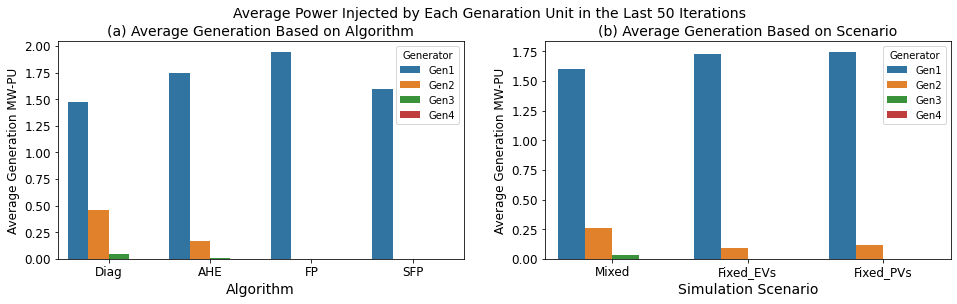

In [6]:
count_algo = 0
count_scen = 0
counter = 0
last_n_iter = 50
no_iterations = 0
gen_list = ['Gen1', 'Gen2', 'Gen3', 'Gen4']
time_list = ['Iteration','Time']
categories = ['cat_01','cat_02', 'cat_03']
            
    
gen_value=[]
gen_col=[]
algo_col=[]
scen_col=[]
cat_col =[]

# Retrive Data
for df in df_all:
    no_iteration = len(df.Iteration.unique())
    if no_iterations > last_n_iter:
        df = df[df['Iteration'] > no_iterations - last_n_iter]
    df = df[[*gen_list, *time_list]]
    df = df[[*gen_list, *time_list]].mean().tolist()[:4]
    count4=0
    for v in df:
        gen_value.append(v);
        gen_col.append(gen_list[count4])
        algo_col.append(algo_list[count_algo])
        scen_col.append(scen_list[count_scen])
        cat_col.append(categories[counter%3])
        count4+=1
    counter+=1
    if counter%3==0:
        count_algo+=1
    if count_algo > 3:
        count_algo=0
    if counter%12==0:
        count_scen+=1

df_compare = pd.DataFrame({'Generator':gen_col, 'Algorithms':algo_col, 'Scenario':scen_col, 'Categories':cat_col, 'Generation':gen_value})

# Plot data
fig, axes = plt.subplots(1, 2, figsize=(16, 4))

order =['Diag', 'AHE', 'FP', 'SFP']
h_order=['Mixed', 'Fixed_EVs', 'Fixed_PVs']

sns.barplot(data= df_compare.groupby(['Generator','Algorithms']).mean().reset_index(),
            x='Algorithms', y='Generation', hue='Generator', hue_order=gen_list , order=order, ax=axes[0])

axes[0].set_title("(a) Average Generation Based on Algorithm", fontsize=14)
axes[0].set_xlabel('Algorithm',fontsize=14);
axes[0].set_ylabel('Average Generation MW-PU',fontsize=12);

sns.barplot(data= df_compare.groupby(['Generator','Scenario']).mean().reset_index(),
            x='Scenario', y='Generation', hue='Generator', hue_order=gen_list, order=h_order,  ax=axes[1])

axes[1].set_title("(b) Average Generation Based on Scenario", fontsize=14)
axes[1].set_xlabel('Simulation Scenario',fontsize=14);
axes[1].set_ylabel('Average Generation MW-PU',fontsize=12);

for ax in axes:
    ax.set_rasterized(True)
    for item in ([ ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(12)

fig.suptitle('Average Power Injected by Each Genaration Unit in the Last %d Iterations'%last_n_iter, fontsize=14, y=1.);

fig.savefig("Figures/Nodal_Figures/Average_Power_Generation.eps", bbox_inches= 'tight')

# Check Nodal Price

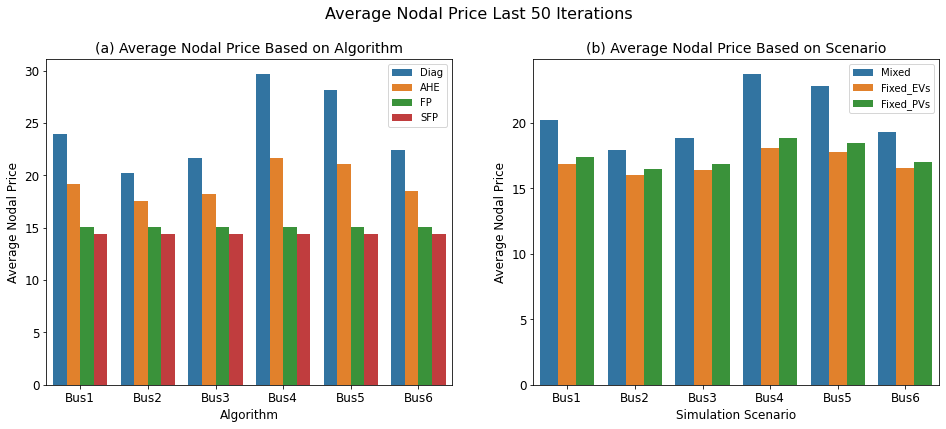

In [7]:
count_algo = 0
count_scen = 0
counter = 0
last_n_iter = 50
no_iterations = 0
bus_names = ['Bus'+str(i)+'_price' for i in range(1,7)]
bus_list = ['Bus'+str(i) for i in range(1,7)]
time_list = ['Iteration','Time']
categories = ['cat_01','cat_02', 'cat_03']
            
    
nodal_price=[]
bus_col=[]
algo_col=[]
scen_col=[]
cat_col =[]

# Retrive Data
for df in df_all:
    no_iteration = len(df.Iteration.unique())
    if no_iterations > last_n_iter:
        df = df[df['Iteration'] > no_iterations - last_n_iter]
    df = df[[*bus_names, *time_list]].mean().tolist()[:6]
    count6=0
    for v in df:
        nodal_price.append(v);
        bus_col.append(bus_list[count6])
        algo_col.append(algo_list[count_algo])
        scen_col.append(scen_list[count_scen])
        cat_col.append(categories[counter%3])
        count6+=1
    counter+=1
    if counter%3==0:
        count_algo+=1
    if count_algo > 3:
        count_algo=0
    if counter%12==0:
        count_scen+=1

df_compare = pd.DataFrame({'Bus':bus_col, 'Algorithms':algo_col, 'Scenario':scen_col, 'Categories':cat_col, 'Nodal_Price':nodal_price})

# Plot data
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

order =['Diag', 'AHE', 'FP', 'SFP']
h_order=['Mixed', 'Fixed_EVs', 'Fixed_PVs']

sns.barplot(data= df_compare.groupby(['Bus','Algorithms']).mean().reset_index(),
            x='Bus', y='Nodal_Price', hue='Algorithms', hue_order=order,  ax=axes[0])

axes[0].set_title("(a) Average Nodal Price Based on Algorithm", fontsize=14)
axes[0].set_xlabel('Algorithm',fontsize=12);
axes[0].set_ylabel('Average Nodal Price',fontsize=12);
axes[0].legend(bbox_to_anchor=(1, 1))

sns.barplot(data= df_compare.groupby(['Bus','Scenario']).mean().reset_index(),
            x='Bus',  y='Nodal_Price', hue='Scenario', hue_order=h_order,  ax=axes[1])

axes[1].set_title("(b) Average Nodal Price Based on Scenario", fontsize=14)
axes[1].set_xlabel('Simulation Scenario',fontsize=12);
axes[1].set_ylabel('Average Nodal Price',fontsize=12);
axes[1].legend(bbox_to_anchor=(1, 1))

for ax in axes:
    ax.set_rasterized(True)
    for item in ([ ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(12)


fig.suptitle('Average Nodal Price Last %d Iterations'%last_n_iter, fontsize=16, y=1.);

fig.savefig("Figures/Nodal_Figures/Average_Nodal_Price.png", bbox_inches= 'tight')


# Check EVs Charge and Discharge

In [8]:
df_all[1]

,Iteration,DAs_load\r\nE_DAs_L,DAs_generation\r\nE_DAs_G,DAs_demand_bid\r\nb_t,DAs_supply_offer\r\no_t,EVs_Charge,EVs_Discharge,TCL_Power,SL_Power,Inflexible_loads,...,Bus4_price,Bus5_price,Bus6_price,Theta_bus_1,Theta_bus_2,Theta_bus_3,Theta_bus_4,Theta_bus_5,Theta_bus_6,Time
0,0,0.000000e+00,0.017963,0.000000e+00,0.017963,0.617305,0.0,0.0,1.516896,3.872870,...,15.0,15.0,15.0,0.0,-0.001625,-0.002114,-0.000904,-0.001671,-0.002352,16
1,0,1.296839e-01,0.000000,1.296839e-01,0.000000,1.253901,0.0,0.0,0.556955,6.336342,...,15.0,15.0,15.0,0.0,-0.012390,-0.015626,-0.009514,-0.010535,-0.017201,17
2,0,6.620734e-01,0.000000,6.620734e-01,0.000000,4.817021,0.0,0.0,5.141200,8.153014,...,15.0,15.0,15.0,0.0,-0.072282,-0.089411,-0.064844,-0.072898,-0.097745,18
3,0,1.039063e+00,0.000000,1.039063e+00,0.000000,6.869787,0.0,0.0,9.962544,9.318037,...,15.0,15.0,15.0,0.0,-0.117390,-0.145501,-0.103755,-0.115640,-0.159177,19
4,0,7.969366e-01,0.000000,7.969366e-01,0.000000,8.459574,0.0,0.0,2.724944,8.815845,...,15.0,15.0,15.0,0.0,-0.089870,-0.111082,-0.081079,-0.090004,-0.121401,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,8,0.000000e+00,0.131627,0.000000e+00,0.131627,0.000000,0.0,0.0,8.812565,3.745796,...,15.0,15.0,15.0,0.0,0.012844,0.021714,-0.019493,-0.009977,0.026028,35
212,8,8.593572e-02,0.000000,8.593572e-02,0.000000,0.000000,0.0,0.0,12.248155,3.551692,...,12.0,12.0,12.0,0.0,-0.001257,-0.002125,0.001908,0.000977,-0.002548,36
213,8,3.448769e-12,0.218414,3.448769e-12,0.218414,0.000000,0.0,0.0,0.000000,3.605833,...,14.0,14.0,14.0,0.0,-0.011637,-0.019672,0.017661,0.019182,-0.023581,37
214,8,3.621916e-02,0.000000,3.621916e-02,0.000000,0.000000,0.0,0.0,12.706603,3.371063,...,12.0,12.0,12.0,0.0,0.000220,0.000372,-0.000334,-0.000171,0.000446,38


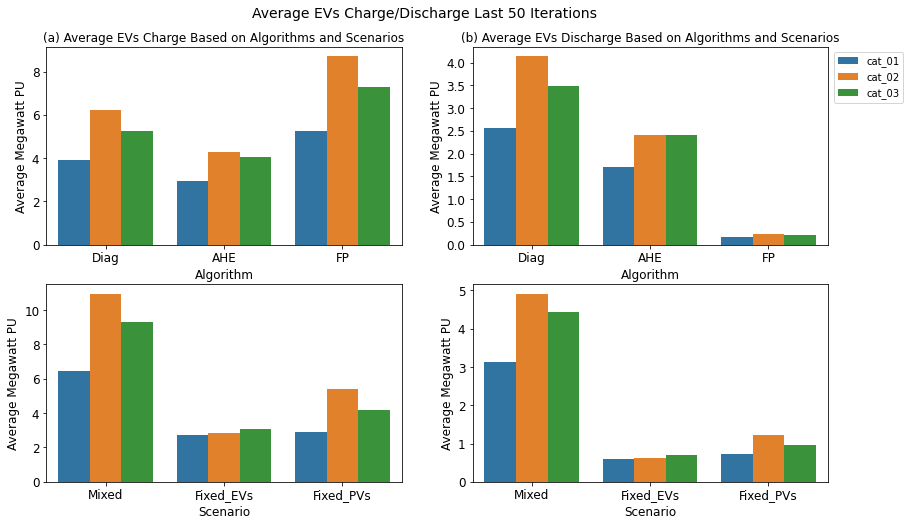

In [23]:
count_algo = 0
count_scen = 0
counter = 0
last_n_iter = 50
no_iterations = 0
EVs_col = ['EVs_Charge','EVs_Discharge']
time_list = ['Iteration','Time']
categories = ['cat_01','cat_02', 'cat_03']
            
    
charge_val=[]
charge_col=[]
algo_col=[]
scen_col=[]
cat_col =[]

# Retrive Data
for df in df_all:
    no_iteration = len(df.Iteration.unique())
    if no_iterations > last_n_iter:
        df = df[df['Iteration'] > no_iterations - last_n_iter]
    df = df[[*EVs_col, *time_list]].mean().tolist()[:2]
    count2=0
    for v in df:
        charge_val.append(v);
        charge_col.append(EVs_col[count2])
        algo_col.append(algo_list[count_algo])
        scen_col.append(scen_list[count_scen])
        cat_col.append(categories[counter%3])
        count2+=1
    counter+=1
    if counter%3==0:
        count_algo+=1
    if count_algo > 3:
        count_algo=0
    if counter%12==0:
        count_scen+=1

df_compare = pd.DataFrame({'Status':charge_col, 'Algorithms':algo_col, 'Scenario':scen_col, 'Categories':cat_col, 'Value':charge_val})

df_compare =df_compare[df_compare.Algorithms!='SFP']

# Plot data
fig, axes = plt.subplots(2, 2, figsize=(14, 8))

order =['Diag', 'AHE', 'FP']
h_order=['Mixed', 'Fixed_EVs', 'Fixed_PVs']

font_s = 12
#*******************************************************
#*****************   Charge EVs Data ******************
df = df_compare.groupby(['Status','Algorithms','Categories']).mean().reset_index()
df = df[df.Status=='EVs_Charge']

sns.barplot(data= df,x='Algorithms', y='Value', hue='Categories', order=order,ax=axes[0,0])
axes[0,0].set_title("(a) Average EVs Charge Based on Algorithms and Scenarios", fontsize=12)
axes[0,0].set_xlabel('Algorithm',fontsize=12);
axes[0,0].set_ylabel('Average Megawatt PU',fontsize=font_s);

df = df_compare.groupby(['Status','Scenario','Categories']).mean().reset_index()
df = df[df.Status=='EVs_Charge']

sns.barplot(data= df,x='Scenario', y='Value', hue='Categories', order=h_order, ax=axes[1,0])
#axes[1,0].set_title("Average EVs Charge Based on Algorithms and Scenarios", fontsize=12)
axes[1,0].set_xlabel('Scenario',fontsize=12);
axes[1,0].set_ylabel('Average Megawatt PU',fontsize=font_s);

#*******************************************************
#*****************   Discharge EVs Data ******************

df = df_compare.groupby(['Status','Algorithms','Categories']).mean().reset_index()
df = df[df.Status=='EVs_Discharge']



sns.barplot(data= df,x='Algorithms', y='Value', hue='Categories', order=order, ax=axes[0,1])
axes[0,1].set_title("(b) Average EVs Discharge Based on Algorithms and Scenarios", fontsize=12)
axes[0,1].set_xlabel('Algorithm',fontsize=12);
axes[0,1].set_ylabel('Average Megawatt PU',fontsize=font_s);

df = df_compare.groupby(['Status','Scenario','Categories']).mean().reset_index()
df = df[df.Status=='EVs_Discharge']

sns.barplot(data= df,x='Scenario', y='Value', hue='Categories', order=h_order, ax=axes[1,1])
#axes[1,1].set_title("Average EVs Charge Based on Algorithms and Scenarios", fontsize=12)
axes[1,1].set_xlabel('Scenario',fontsize=12);
axes[1,1].set_ylabel('Average Megawatt PU',fontsize=font_s);

handles, labels = axes.flatten()[0].get_legend_handles_labels()
#fig.legend(handles, labels, loc='upper right')
fig.legend(handles, labels, bbox_to_anchor=(0.98, 0.88))

for ax in axes.flatten():
    ax.get_legend().remove()
    #ax.set_rasterized(True)
    for item in ([ ax.xaxis.label, ax.yaxis.label] +ax.get_xticklabels() + ax.get_yticklabels()): # [ ax.yaxis.label] + 
        item.set_fontsize(12)
fig.suptitle('Average EVs Charge/Discharge Last %d Iterations'%last_n_iter, fontsize=14, y=0.95);

fig.savefig("Figures/Nodal_Figures/Average_EVs_Charge_Discharge.png", bbox_inches= 'tight', dpi=300)

In [49]:
df = df_all[1]
no_iteration = len(df.Iteration.unique())
if no_iterations > last_n_iter:
    df = df[df['Iteration'] > no_iterations - last_n_iter]
df = df[[*EVs_col, *time_list]].mean()

In [76]:
df = df_compare.groupby(['Status','Algorithms','Categories']).mean().reset_index()
df = df[df.Status=='EVs_Charge']
df_compare[df_compare.Algorithms!='SFP']

,Status,Algorithms,Scenario,Categories,Value
0,EVs_Charge,AHE,Mixed,cat_01,6.375737
1,EVs_Discharge,AHE,Mixed,cat_01,4.031006
2,EVs_Charge,AHE,Mixed,cat_02,9.415983
3,EVs_Discharge,AHE,Mixed,cat_02,5.560122
4,EVs_Charge,AHE,Mixed,cat_03,9.013750
5,EVs_Discharge,AHE,Mixed,cat_03,5.711892
6,EVs_Charge,Diag,Mixed,cat_01,7.689401
7,EVs_Discharge,Diag,Mixed,cat_01,5.191759
8,EVs_Charge,Diag,Mixed,cat_02,13.257075
9,EVs_Discharge,Diag,Mixed,cat_02,8.954112
